In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings('ignore')

## DATAFRAMES POR INSTANCIA

In [2]:
# Leer los datos del archivo csv en el archivo de la carpeta output y guardarlos en un dataframe
df = pd.read_csv('../output/results.csv')
df

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Swap+Relocate(Bin Packing)_free,Relocate+Swap(Greedy)_cost,Relocate+Swap(Greedy)_time,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Meta_cost,Meta_time,Meta_free
0,a05100,5,100,1709.0,0.125334,0,3206.0,0.321583,0,1700.0,...,0,1709.0,0.125334,0,1698.0,34.8668,0,0,0,0
1,a20100,20,100,1170.0,0.102334,0,2972.0,0.432166,0,1168.0,...,0,1170.0,0.102334,0,1161.0,47.7975,0,0,0,0
2,a10100,10,100,1390.0,0.062833,0,2954.0,0.179042,0,1367.0,...,0,1390.0,0.062833,0,1363.0,27.5177,0,0,0,0
3,a05200,5,200,3259.0,0.085042,0,6075.0,0.203959,0,3238.0,...,0,3259.0,0.085042,0,3235.0,147.9510,0,0,0,0
4,a20200,20,200,2371.0,0.142375,0,5855.0,0.645292,0,2353.0,...,0,2371.0,0.142375,0,2345.0,257.1740,0,0,0,0
5,a10200,10,200,2670.0,0.100541,0,6183.0,0.313792,0,2632.0,...,0,2670.0,0.100541,0,2629.0,192.4350,0,0,0,0
6,b10200,10,200,8255.0,0.089084,42,6031.0,0.315916,0,7788.0,...,0,8255.0,0.089084,42,3007.0,164.2120,0,0,0,0
7,b20200,20,200,3628.0,0.143292,7,5860.0,0.633916,0,3335.0,...,0,3628.0,0.143292,7,2437.0,243.5000,0,0,0,0
8,b05200,5,200,8050.0,0.067583,40,6059.0,0.192000,0,7487.0,...,0,8050.0,0.067583,40,3640.0,118.5760,0,0,0,0
9,b10100,10,100,2115.0,0.051041,4,2980.0,0.162875,0,1952.0,...,0,2115.0,0.051041,4,1439.0,28.6163,0,0,0,0


In [3]:
# column name contains the word cost
heuristics = df.columns[df.columns.str.contains('cost')].map(lambda x: x.split('_')[0]).unique()
heuristics

Index(['Greedy', 'Binpacking', 'Swap(Greedy)', 'Swap(Bin Packing)',
       'Relocate(Greedy)', 'Relocate(Bin Packing)', 'Swap+Relocate(Greedy)',
       'Swap+Relocate(Bin Packing)', 'Relocate+Swap(Greedy)',
       'Relocate+Swap(Bin Packing)', 'Meta'],
      dtype='object')

In [4]:
df["InstanceGroup"] = df["Filename"].str[0]
df

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Greedy)_cost,Relocate+Swap(Greedy)_time,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Meta_cost,Meta_time,Meta_free,InstanceGroup
0,a05100,5,100,1709.0,0.125334,0,3206.0,0.321583,0,1700.0,...,1709.0,0.125334,0,1698.0,34.8668,0,0,0,0,a
1,a20100,20,100,1170.0,0.102334,0,2972.0,0.432166,0,1168.0,...,1170.0,0.102334,0,1161.0,47.7975,0,0,0,0,a
2,a10100,10,100,1390.0,0.062833,0,2954.0,0.179042,0,1367.0,...,1390.0,0.062833,0,1363.0,27.5177,0,0,0,0,a
3,a05200,5,200,3259.0,0.085042,0,6075.0,0.203959,0,3238.0,...,3259.0,0.085042,0,3235.0,147.9510,0,0,0,0,a
4,a20200,20,200,2371.0,0.142375,0,5855.0,0.645292,0,2353.0,...,2371.0,0.142375,0,2345.0,257.1740,0,0,0,0,a
5,a10200,10,200,2670.0,0.100541,0,6183.0,0.313792,0,2632.0,...,2670.0,0.100541,0,2629.0,192.4350,0,0,0,0,a
6,b10200,10,200,8255.0,0.089084,42,6031.0,0.315916,0,7788.0,...,8255.0,0.089084,42,3007.0,164.2120,0,0,0,0,b
7,b20200,20,200,3628.0,0.143292,7,5860.0,0.633916,0,3335.0,...,3628.0,0.143292,7,2437.0,243.5000,0,0,0,0,b
8,b05200,5,200,8050.0,0.067583,40,6059.0,0.192000,0,7487.0,...,8050.0,0.067583,40,3640.0,118.5760,0,0,0,0,b
9,b10100,10,100,2115.0,0.051041,4,2980.0,0.162875,0,1952.0,...,2115.0,0.051041,4,1439.0,28.6163,0,0,0,0,b


In [11]:
# Separo las instancias
a_instance = df[df["InstanceGroup"] == "a"]
b_instance = df[df["InstanceGroup"] == "b"]
e_instance = df[df["InstanceGroup"] == "e"]
real_instance = df[df["InstanceGroup"] == "r"]


In [12]:
instances = df["InstanceGroup"].unique()

## Costo de cada instancia

In [13]:
# COSTO DE CADA INSTANCIA
costs = [df[df["InstanceGroup"] == i] for i in instances]

#if column contains "time" or "free", filter it

for cost in costs:
    cost = cost.drop(cost.columns[cost.columns.str.contains('time')], axis=1, inplace=True)

for cost in costs:
    cost = cost.drop(cost.columns[cost.columns.str.contains('free')], axis=1, inplace=True)

costs[0]

,Filename,Depositos,Vendedores,Greedy_cost,Binpacking_cost,Swap(Greedy)_cost,Swap(Bin Packing)_cost,Relocate(Greedy)_cost,Relocate(Bin Packing)_cost,Swap+Relocate(Greedy)_cost,Swap+Relocate(Bin Packing)_cost,Relocate+Swap(Greedy)_cost,Relocate+Swap(Bin Packing)_cost,Meta_cost,InstanceGroup
0,a05100,5,100,1709.0,3206.0,1700.0,1712.0,1709.0,1719.0,1709.0,1699.0,1709.0,1698.0,0,a
1,a20100,20,100,1170.0,2972.0,1168.0,1245.0,1170.0,1165.0,1170.0,1163.0,1170.0,1161.0,0,a
2,a10100,10,100,1390.0,2954.0,1367.0,1395.0,1390.0,1369.0,1390.0,1369.0,1390.0,1363.0,0,a
3,a05200,5,200,3259.0,6075.0,3238.0,3258.0,3259.0,3236.0,3259.0,3235.0,3259.0,3235.0,0,a
4,a20200,20,200,2371.0,5855.0,2353.0,2423.0,2371.0,2357.0,2371.0,2354.0,2371.0,2345.0,0,a
5,a10200,10,200,2670.0,6183.0,2632.0,2677.0,2670.0,2636.0,2670.0,2633.0,2670.0,2629.0,0,a


## Tiempo de cada instancia

In [14]:
# COSTO DE CADA INSTANCIA
times = [df[df["InstanceGroup"] == i] for i in instances]

#if column contains "cost" or "free", filter it

for time in times:
    time = time.drop(time.columns[time.columns.str.contains('cost')], axis=1, inplace=True)

for time in times:
    time = time.drop(time.columns[time.columns.str.contains('free')], axis=1, inplace=True)

times[0]

,Filename,Depositos,Vendedores,Greedy_time,Binpacking_time,Swap(Greedy)_time,Swap(Bin Packing)_time,Relocate(Greedy)_time,Relocate(Bin Packing)_time,Swap+Relocate(Greedy)_time,Swap+Relocate(Bin Packing)_time,Relocate+Swap(Greedy)_time,Relocate+Swap(Bin Packing)_time,Meta_time,InstanceGroup
0,a05100,5,100,0.125334,0.321583,3.54071,34.5985,0.272542,4.90879,0.125334,7.06254,0.125334,34.8668,0,a
1,a20100,20,100,0.102334,0.432166,1.64033,43.2315,0.281209,16.33210,0.102334,17.53860,0.102334,47.7975,0,a
2,a10100,10,100,0.062833,0.179042,1.84892,26.6870,0.136542,7.62175,0.062833,7.99304,0.062833,27.5177,0,a
3,a05200,5,200,0.085042,0.203959,7.49646,147.3460,0.168542,12.68770,0.085042,15.23610,0.085042,147.9510,0,a
4,a20200,20,200,0.142375,0.645292,7.30258,249.1450,0.393625,59.29600,0.142375,63.38490,0.142375,257.1740,0,a
5,a10200,10,200,0.100541,0.313792,14.38250,190.1770,0.236666,29.21270,0.100541,33.03910,0.100541,192.4350,0,a


## Vendedores sin asignar de cada instancia

In [15]:
# Libres
frees = [df[df["InstanceGroup"] == i] for i in instances]

#if column contains "time" or "cost", filter it

for free in frees:
    free = free.drop(free.columns[free.columns.str.contains('cost')], axis=1, inplace=True)

for free in frees:
    free = free.drop(free.columns[free.columns.str.contains('time')], axis=1, inplace=True)

frees[0]

,Filename,Depositos,Vendedores,Greedy_free,Binpacking_free,Swap(Greedy)_free,Swap(Bin Packing)_free,Relocate(Greedy)_free,Relocate(Bin Packing)_free,Swap+Relocate(Greedy)_free,Swap+Relocate(Bin Packing)_free,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_free,Meta_free,InstanceGroup
0,a05100,5,100,0,0,0,0,0,0,0,0,0,0,0,a
1,a20100,20,100,0,0,0,0,0,0,0,0,0,0,0,a
2,a10100,10,100,0,0,0,0,0,0,0,0,0,0,0,a
3,a05200,5,200,0,0,0,0,0,0,0,0,0,0,0,a
4,a20200,20,200,0,0,0,0,0,0,0,0,0,0,0,a
5,a10200,10,200,0,0,0,0,0,0,0,0,0,0,0,a


In [16]:
# Print de las instancias
display(Markdown('## Instancia A'))
display(a_instance)

display(Markdown('## Instancia B'))
display(b_instance)

display(Markdown('## Instancia E'))
display(e_instance)

display(Markdown('## Instancia Real'))
display(real_instance)

## Instancia A

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Greedy)_cost,Relocate+Swap(Greedy)_time,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Meta_cost,Meta_time,Meta_free,InstanceGroup
0,a05100,5,100,1709.0,0.125334,0,3206.0,0.321583,0,1700.0,...,1709.0,0.125334,0,1698.0,34.8668,0,0,0,0,a
1,a20100,20,100,1170.0,0.102334,0,2972.0,0.432166,0,1168.0,...,1170.0,0.102334,0,1161.0,47.7975,0,0,0,0,a
2,a10100,10,100,1390.0,0.062833,0,2954.0,0.179042,0,1367.0,...,1390.0,0.062833,0,1363.0,27.5177,0,0,0,0,a
3,a05200,5,200,3259.0,0.085042,0,6075.0,0.203959,0,3238.0,...,3259.0,0.085042,0,3235.0,147.9510,0,0,0,0,a
4,a20200,20,200,2371.0,0.142375,0,5855.0,0.645292,0,2353.0,...,2371.0,0.142375,0,2345.0,257.1740,0,0,0,0,a
5,a10200,10,200,2670.0,0.100541,0,6183.0,0.313792,0,2632.0,...,2670.0,0.100541,0,2629.0,192.4350,0,0,0,0,a


## Instancia B

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Greedy)_cost,Relocate+Swap(Greedy)_time,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Meta_cost,Meta_time,Meta_free,InstanceGroup
6,b10200,10,200,8255.0,0.089084,42,6031.0,0.315916,0,7788.0,...,8255.0,0.089084,42,3007.0,164.2120,0,0,0,0,b
7,b20200,20,200,3628.0,0.143292,7,5860.0,0.633916,0,3335.0,...,3628.0,0.143292,7,2437.0,243.5000,0,0,0,0,b
8,b05200,5,200,8050.0,0.067583,40,6059.0,0.192000,0,7487.0,...,8050.0,0.067583,40,3640.0,118.5760,0,0,0,0,b
9,b10100,10,100,2115.0,0.051041,4,2980.0,0.162875,0,1952.0,...,2115.0,0.051041,4,1439.0,28.6163,0,0,0,0,b
10,b20100,20,100,1660.0,0.082333,2,3006.0,0.312375,0,1512.0,...,1660.0,0.082333,2,1221.0,34.4910,0,0,0,0,b
11,b05100,5,100,4972.0,0.034042,27,2979.0,0.101875,0,4677.0,...,4972.0,0.034042,27,1985.0,11.2442,0,0,0,0,b


## Instancia E

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Greedy)_cost,Relocate+Swap(Greedy)_time,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Meta_cost,Meta_time,Meta_free,InstanceGroup
12,e401600,40,1600,3550530.0,1.399380,1186,1496530.0,9.355960,0,3528280.0,...,3550530.0,1.399380,1186,1225240.0,88981.9000,0,0,0,0,e
13,e15900,15,900,1675160.0,0.370625,628,681052.0,2.085420,0,1665340.0,...,1675160.0,0.370625,628,517134.0,14134.9000,0,0,0,0,e
14,e60900,60,900,1879710.0,1.170330,615,868102.0,7.717370,0,1867030.0,...,1879710.0,1.170330,615,672586.0,16626.9000,0,0,0,0,e
15,e801600,80,1600,3559140.0,2.706540,1167,1563090.0,18.120700,0,3534730.0,...,3559140.0,2.706540,1167,1249640.0,99794.1000,0,0,0,0,e
16,e30900,30,900,1900960.0,0.645167,643,807924.0,3.997630,0,1890960.0,...,1900960.0,0.645167,643,629667.0,15779.3000,0,0,0,0,e
17,e40400,40,400,739996.0,0.400458,239,368473.0,2.440420,0,733089.0,...,739996.0,0.400458,239,254557.0,1532.1500,0,0,0,0,e
18,e201600,20,1600,3261900.0,0.803000,1164,1350790.0,4.910870,0,3250960.0,...,3261900.0,0.803000,1164,1076760.0,84397.1000,0,0,0,0,e
19,e20400,20,400,746075.0,0.207459,265,320970.0,1.211210,0,741821.0,...,746075.0,0.207459,265,234469.0,1269.2300,0,0,0,0,e
20,e10400,10,400,633169.0,0.132292,261,272013.0,0.655667,0,628674.0,...,633169.0,0.132292,261,184732.0,1105.1600,0,0,0,0,e
21,e05100,5,100,92769.0,0.026959,46,53515.0,0.095667,0,91313.0,...,92769.0,0.026959,46,24232.0,16.7509,0,0,0,0,e


## Instancia Real

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Greedy)_cost,Relocate+Swap(Greedy)_time,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Meta_cost,Meta_time,Meta_free,InstanceGroup
27,real_instance,310,1100,964.9,8.482,0,10629.0,36.3751,0,824.2,...,964.9,8.482,0,764.7,74749.7,0,0,0,0,r


## GRAFICOS

### 1. COSTOS

In [34]:
costs[0]

,Filename,Depositos,Vendedores,Greedy_cost,Binpacking_cost,Swap(Greedy)_cost,Swap(Bin Packing)_cost,Relocate(Greedy)_cost,Relocate(Bin Packing)_cost,Swap+Relocate(Greedy)_cost,Swap+Relocate(Bin Packing)_cost,Relocate+Swap(Greedy)_cost,Relocate+Swap(Bin Packing)_cost,Meta_cost,InstanceGroup,Vendedores-Depositos
0,a05100,5,100,1709.0,3206.0,1700.0,1712.0,1709.0,1719.0,1709.0,1699.0,1709.0,1698.0,0,a,100-5
1,a20100,20,100,1170.0,2972.0,1168.0,1245.0,1170.0,1165.0,1170.0,1163.0,1170.0,1161.0,0,a,100-20
2,a10100,10,100,1390.0,2954.0,1367.0,1395.0,1390.0,1369.0,1390.0,1369.0,1390.0,1363.0,0,a,100-10
3,a05200,5,200,3259.0,6075.0,3238.0,3258.0,3259.0,3236.0,3259.0,3235.0,3259.0,3235.0,0,a,200-5
4,a20200,20,200,2371.0,5855.0,2353.0,2423.0,2371.0,2357.0,2371.0,2354.0,2371.0,2345.0,0,a,200-20
5,a10200,10,200,2670.0,6183.0,2632.0,2677.0,2670.0,2636.0,2670.0,2633.0,2670.0,2629.0,0,a,200-10


,Filename,Depositos,Vendedores,Greedy_cost,Binpacking_cost,Swap(Greedy)_cost,Swap(Bin Packing)_cost,Relocate(Greedy)_cost,Relocate(Bin Packing)_cost,Swap+Relocate(Greedy)_cost,Swap+Relocate(Bin Packing)_cost,Relocate+Swap(Greedy)_cost,Relocate+Swap(Bin Packing)_cost,Meta_cost,InstanceGroup,Vendedores-Depositos
27,real_instance,310,1100,964.9,10629.0,824.2,1146.8,794.1,797.8,964.9,729.8,964.9,764.7,0,r,1100-310


(0.0, 1000.0)

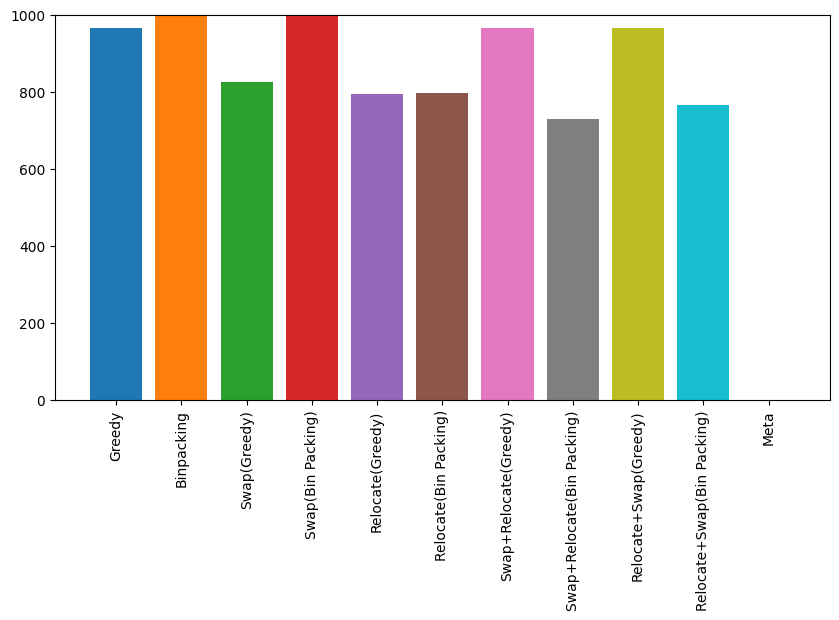

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sub_df = costs[-1].tail(1)
display(sub_df)
for h in heuristics:
    ax.bar(h, sub_df[h+"_cost"], label=h)

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

ax.set_ylim(0, 1000)



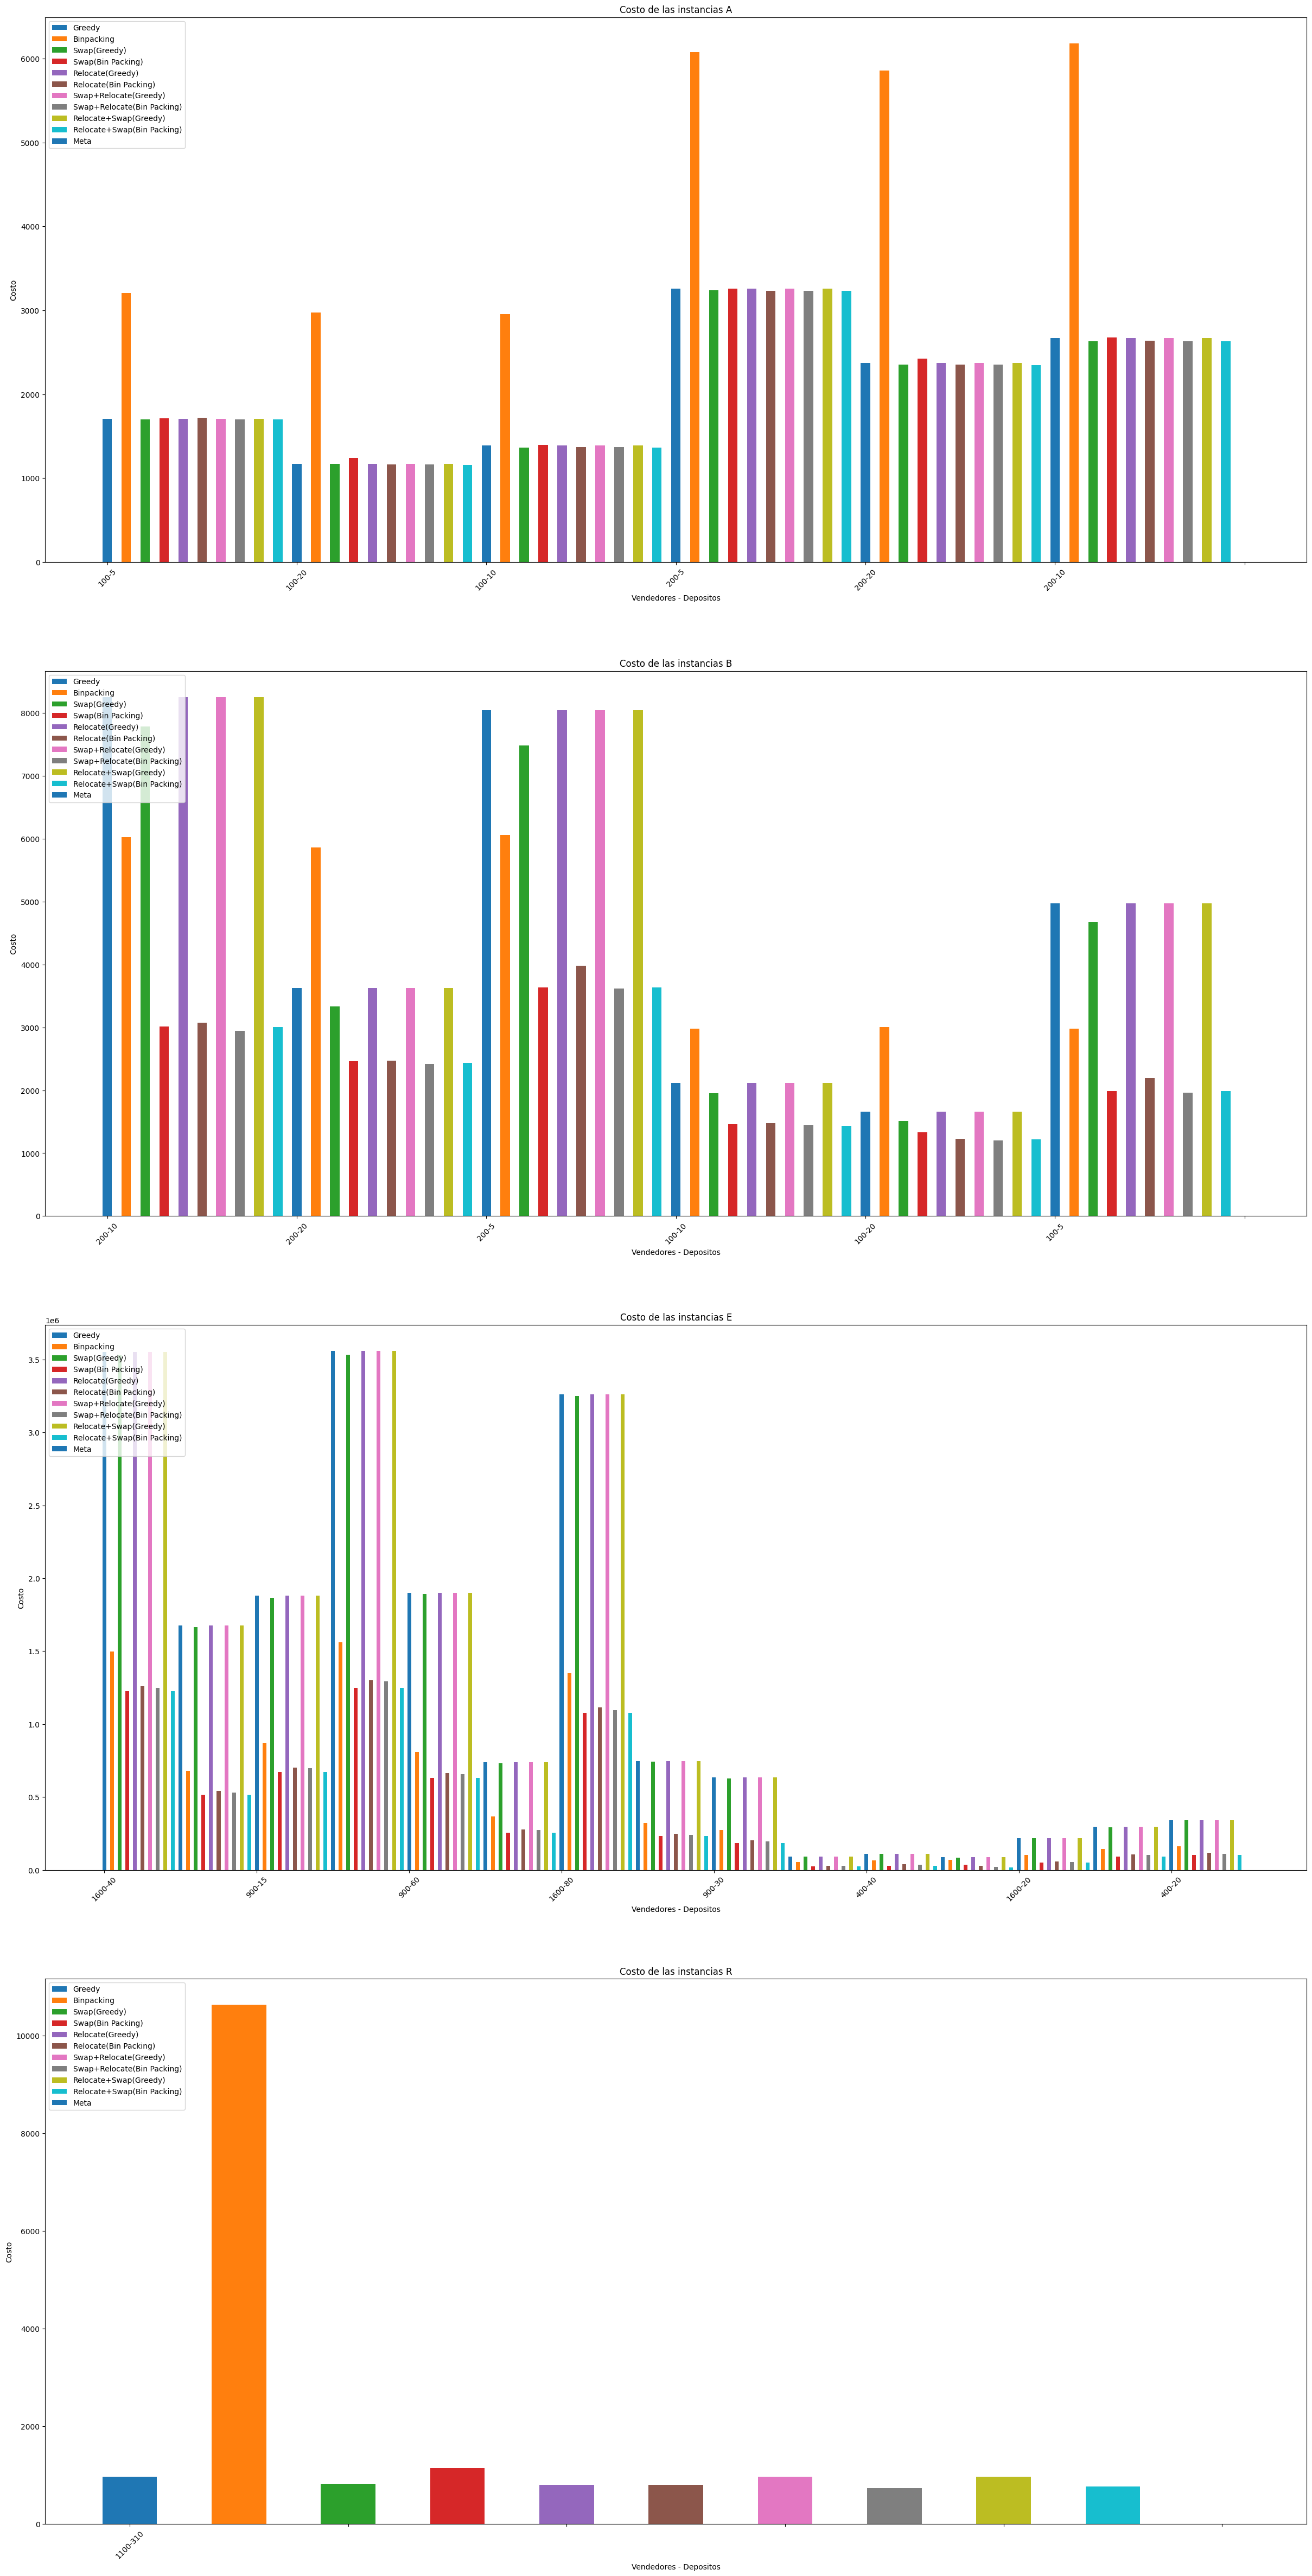

In [18]:
fig, axs = plt.subplots(len(costs), 1, figsize=(30, 60))

for i, cost in enumerate(costs):

    cost['Vendedores-Depositos'] = cost['Vendedores'].astype(str) + '-' + cost['Depositos'].astype(str)

    axs[i].set_title('Costo de las instancias ' + cost['InstanceGroup'].unique()[0].upper())
    axs[i].set_xlabel('Vendedores - Depositos')
    axs[i].set_ylabel('Costo')

    for h in heuristics:
        axs[i].bar(np.arange(len(cost['Vendedores-Depositos'])) + (heuristics == h).argmax() * 0.1, cost[h+"_cost"], width=0.05, label=h)

    axs[i].legend()

    # add division between 'Vendedores-Depositos'

    axs[i].set_xticklabels([""] + list(cost['Vendedores-Depositos']))



for i, ax in enumerate(axs):
    ax.set_xticklabels([""] + list(costs[i]['Vendedores-Depositos']))
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.legend(loc='upper left')

    # leave some space between subplots



### 2. TIEMPOS

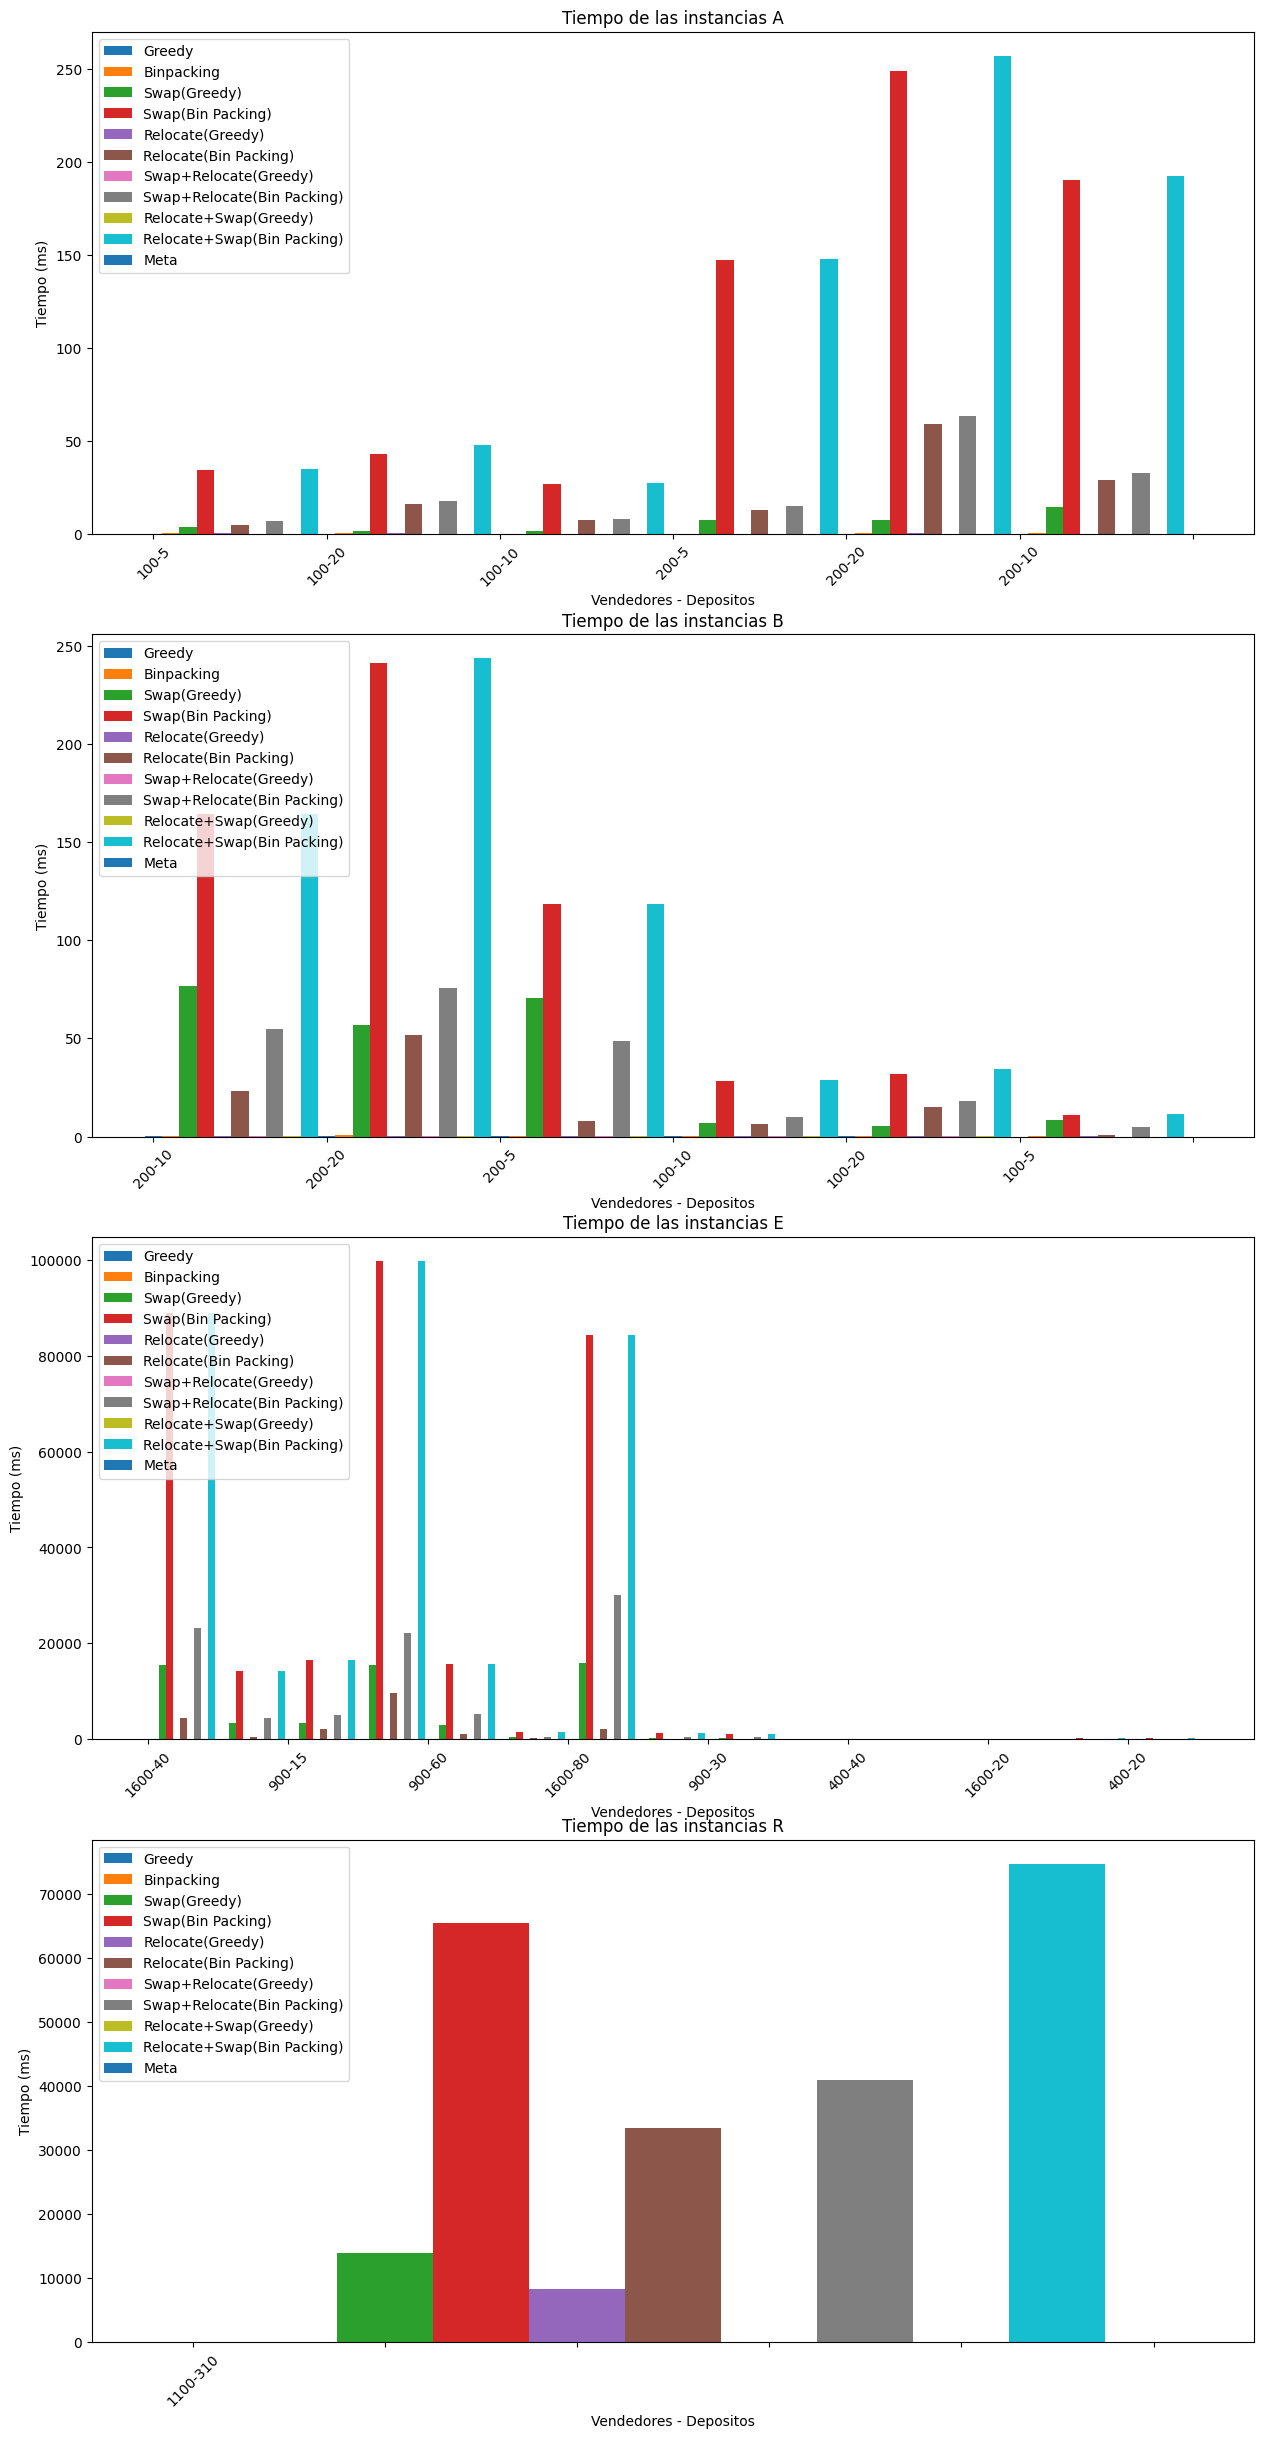

In [19]:
fig, axs = plt.subplots(len(times), 1, figsize=(15, 30))

for i, time in enumerate(times):

    time['Vendedores-Depositos'] = time['Vendedores'].astype(str) + '-' + time['Depositos'].astype(str)

    axs[i].set_title('Tiempo de las instancias ' + time['InstanceGroup'].unique()[0].upper())
    axs[i].set_xlabel('Vendedores - Depositos')
    axs[i].set_ylabel('Tiempo (ms)')

    for h in heuristics:
        # Bar plot
        axs[i].bar(np.arange(len(time['Vendedores-Depositos'])) + (heuristics == h).argmax() * 0.1, time[h+"_time"], width=0.1, label=h)

    axs[i].legend()

for i, ax in enumerate(axs):
    ax.set_xticklabels([""] + list(times[i]['Vendedores-Depositos']))
    # rotate x tick labels
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.legend(loc='upper left')


## Cantidad de vendedores sin asignar

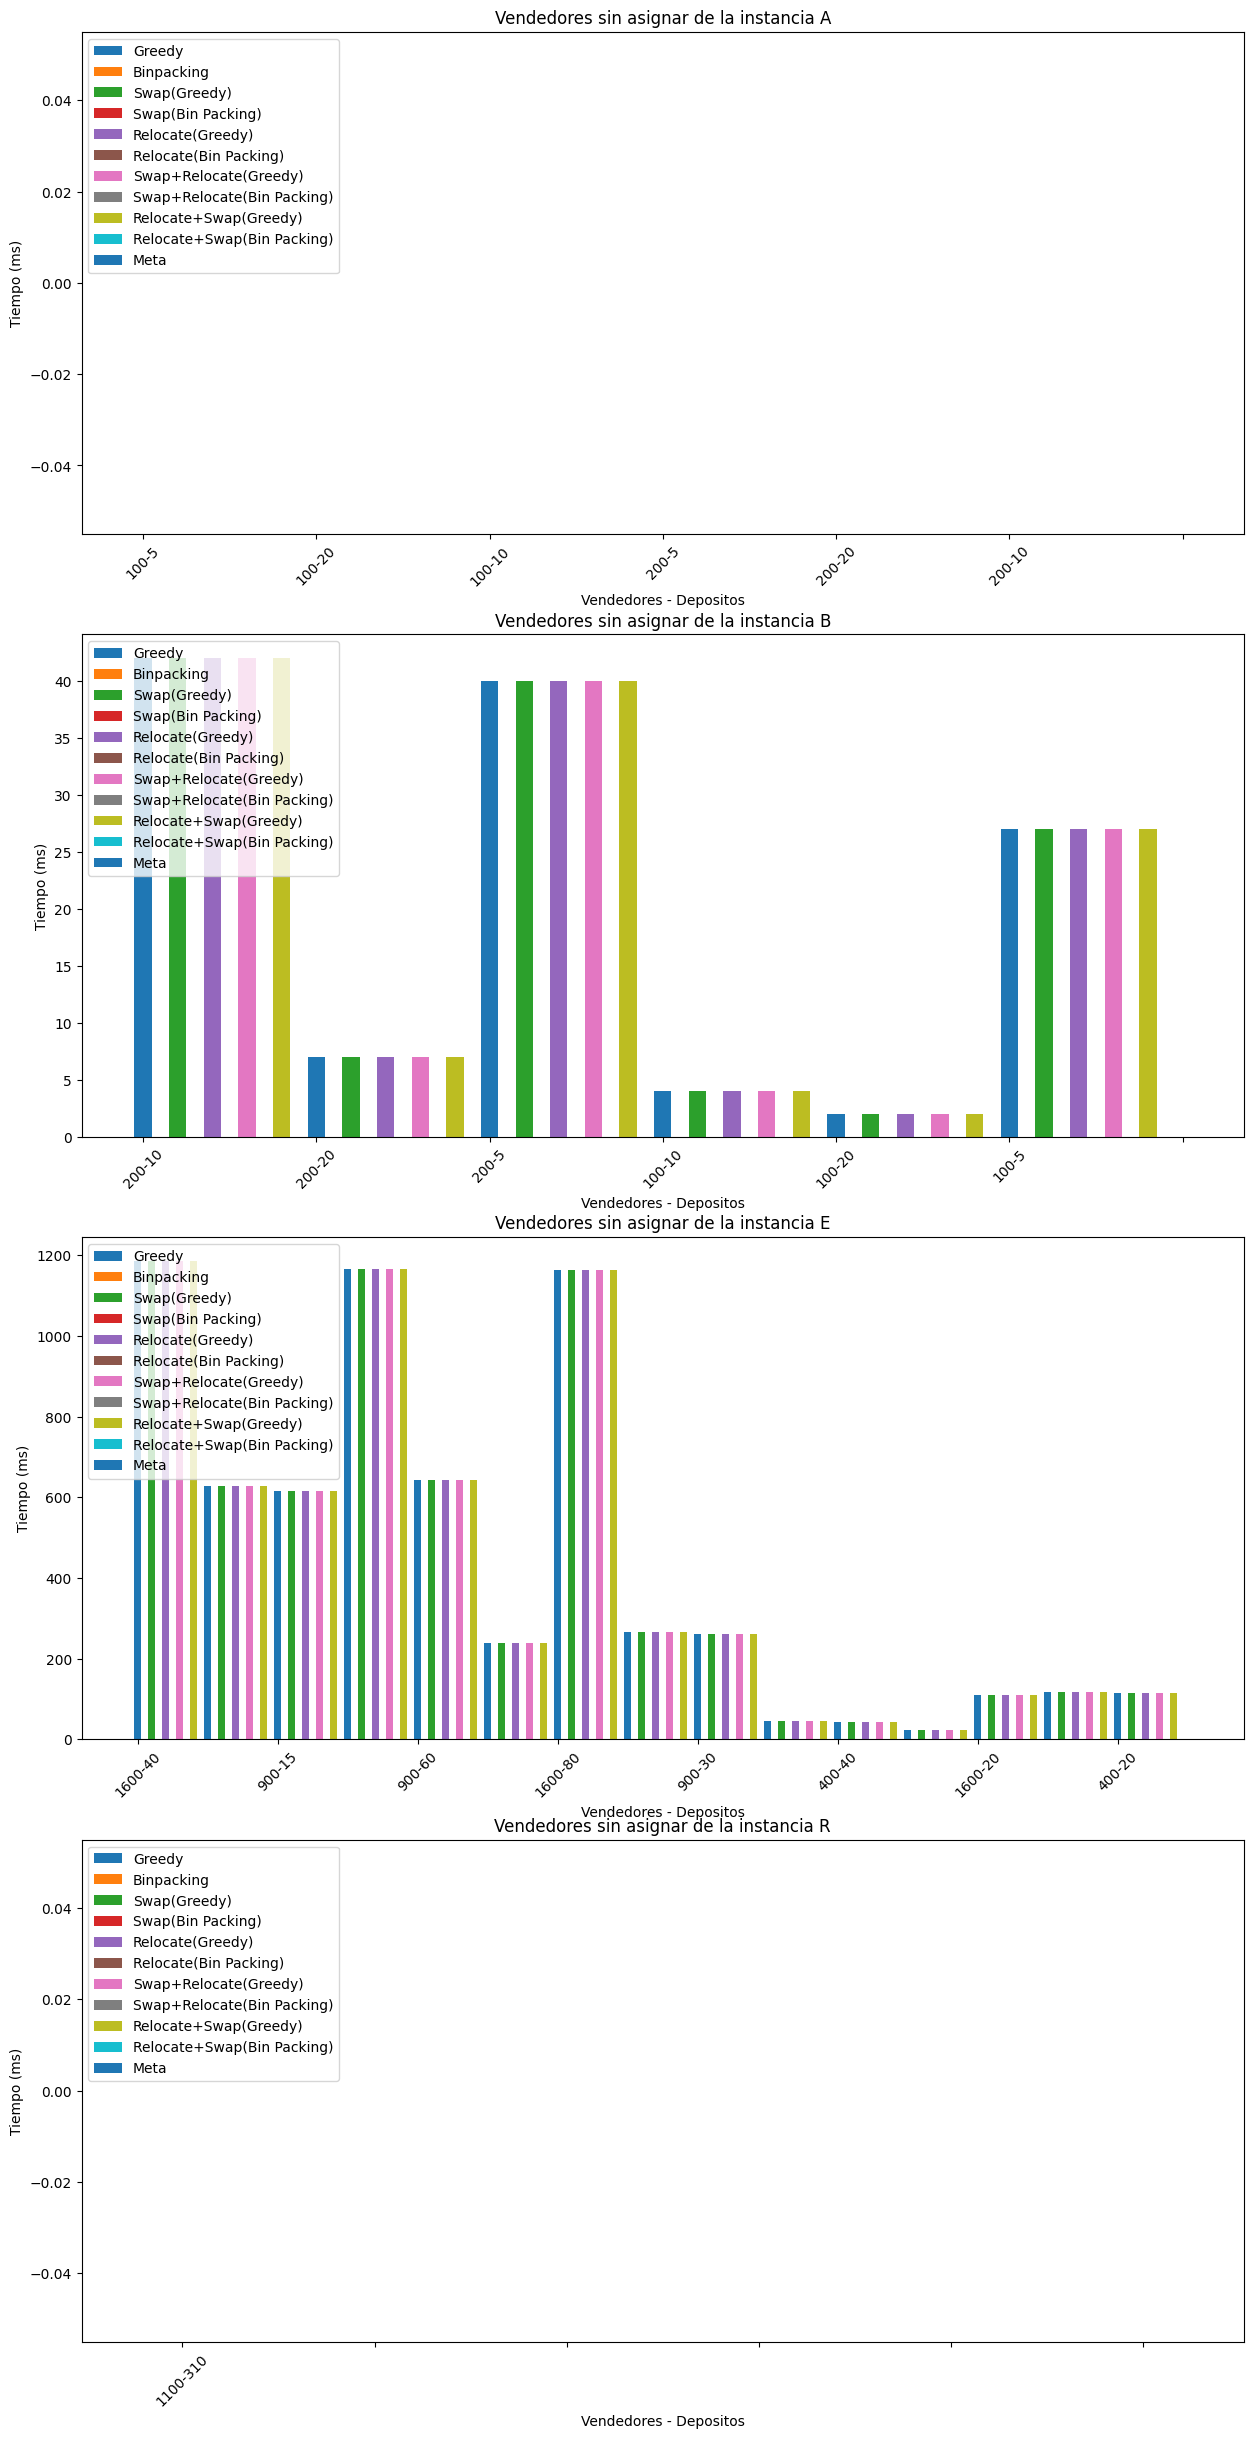

In [20]:
fig, axs = plt.subplots(len(frees), 1, figsize=(15, 30))

for i, free in enumerate(frees):

    free['Vendedores-Depositos'] = free['Vendedores'].astype(str) + '-' + free['Depositos'].astype(str)

    axs[i].set_title('Vendedores sin asignar de la instancia ' + free['InstanceGroup'].unique()[0].upper())
    axs[i].set_xlabel('Vendedores - Depositos')
    axs[i].set_ylabel('Tiempo (ms)')

    for h in heuristics:
        # Bar plot
        axs[i].bar(np.arange(len(free['Vendedores-Depositos'])) + (heuristics == h).argmax() * 0.1, free[h+"_free"], width=0.1, label=h)

    axs[i].legend()

for i, ax in enumerate(axs):
    ax.set_xticklabels([""] + list(frees[i]['Vendedores-Depositos']))
    # rotate x tick labels
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.legend(loc='upper left')


### 3. INSTANCIA REAL

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].set_title('Costo de la instancia real')
axs[0].set_xlabel('Algoritmos')
axs[0].set_ylabel('Costo')

axs[0].bar(np.arange(len(real_instance[3::2])), real_instance[3::2], align='center', alpha=0.5, width=1)
# axs[0].set_xticklabels([""] + [x[:-5] for x in real_instance.index[3::2]])
axs[0].set_xticklabels([""])

axs[1].set_title('Tiempo de la instancia real')
axs[1].set_xlabel('Algoritmos')
axs[1].set_ylabel('Tiempo (ms)')

axs[1].bar(np.arange(len(real_instance[4::2])), real_instance[4::2], align='center', alpha=0.5, width=1)
# axs[1].set_xticklabels([""] + [x[:-5] for x in real_instance.index[4::2]])

axs[0].legend(['Vendedores: ' + str(real_instance[1]) + ' - Depositos: ' + str(real_instance[2])])
axs[1].legend(['Vendedores: ' + str(real_instance[1]) + ' - Depositos: ' + str(real_instance[2])])

for ax in axs:
    for tick in ax.get_xticklabels():
        tick.set_rotation(20)

_ = plt.show()

In [ ]:
real_instance[heuristics + '_cost']

In [ ]:
real_instance[heuristics + '_time']